# 1.

In [ ]:
import numpy as np
import itertools

data = np.loadtxt('clusters.txt')

class kmeans():
    def __init__(self, data):
        self.n_samples = data.shape[0]
        if data.shape == (self.n_samples,):
            self.data = data.reshape(-1,1)
        else:
            self.data = data
    
    def plot_data(self, bins=30):
        import matplotlib.pyplot as plt
        params = self.data.shape[1]
        if params >= 2:
            fig, ax = plt.subplots(params)
            for i in range(params - 1):
                ax[i].scatter(self.data[:,i], self.data[:,i+1], alpha=0.5)
        else:
            plt.hist(self.data, bins=bins)
        plt.show()

    def fit(self, k=3, max_iters=100):
        self.k = k
        random_ind = np.random.choice(self.n_samples, k, replace=False)
        self.centroids = np.sort(self.data[random_ind], axis=0)

        for _ in range(max_iters):
            distance = np.linalg.norm(self.data - self.centroids)
            self.labels = np.argmin(distance, axis=1)
            new_centroids = np.array([np.mean(self.data[self.labels==i]) for i in range(k)])
            new_centroids = np.sort(new_centroids)
            if np.allclose(self.centroids, new_centroids, atol=1e-6):
                self.centroids = new_centroids
                break
            self.centroids = new_centroids
            #print(f'Updated centroids: {self.centroids}')
        distance = np.abs(self.data.reshape(-1,1) - self.centroids)
        self.labels = np.argmin(distance, axis=1)
    def replot(self, bins=30):
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(self.k)
        for i in range(self.k):
            ax[i].hist(self.data[self.labels==i], bins=bins, alpha=0.5, label=f'Cluster {i}')
            ax[i].set_xlim(np.min(self.data), np.max(self.data))
            ax[i].axvline(self.centroids[i], color='k', linestyle='--', label=f'Centroid = {self.centroids[i]:.2f}')
            ax[i].legend()
        plt.show()
    
    def elbow_plot(self):
        import matplotlib.pyplot as plt
        k_values = range(1, 11)
        sum_of_squared = []
        for k in k_values:
            self.fit(k=k)
            sum_of_squared.append(sum([np.var(self.data[self.labels==i]) for i in range(k)]))
        plt.plot(k_values, sum_of_squared, marker='o')
        plt.xlabel('Number of clusters k')
        plt.ylabel('Sum of variances')
        plt.show()




In [87]:
data.shape == (1875,)

True

In [81]:
km = kmeans(data)
km.plot_data()
km.fit(k=2)
km.replot()
km.elbow_plot()


IndexError: tuple index out of range

# 3. 

/var/folders/gw/92tc4nh17vng_8cx29xtgqp80000gn/T/ipykernel_1852/2507729655.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


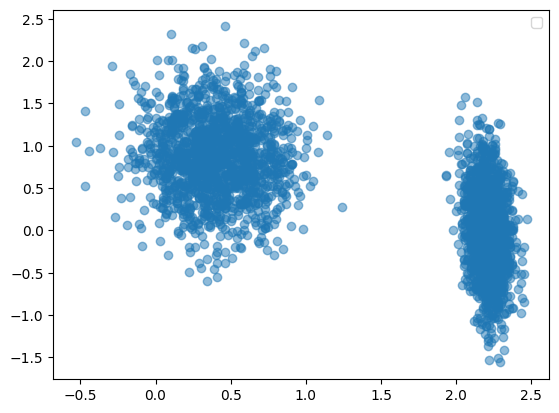

In [84]:
twod_cluster = np.loadtxt('two_d_cluster.txt')
twod_cluster.reshape(-1,2)
km2d = kmeans(twod_cluster)
km2d.plot_data()